# Aula 3.1 - Numpy pt2

Na última aula, vimos o básico da biblioteca NumPy, utilizada para computação científica. Hoje, vamos tentar sedimentar nosso conhecimento com uma rápida revisão, e depois conversar um pouco sobre maiores detalhes da biblioteca. 

---

## Revisão

In [1]:
# Lembrando do import do numpy como "np"
import numpy as np

In [2]:
# A estrutura de dados básica do numpy é o "ndarray"
var = np.array([[[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9]],
                [[-1, 0, 0],
                 [0, -1, 0],
                 [0,  0, 1]],])

# Ela possui atributos básicos de dimensão, formato, número de elementos,
# e tipo dos elementos
print("Dimensões:",var.ndim)
print("Formato:",var.shape)
print("Número de elementos:",var.size)
print("Tipo dos elementos:",var.dtype)

Dimensões: 3
Formato: (2, 3, 3)
Número de elementos: 18
Tipo dos elementos: int32


In [3]:
# Nós também podemos criar alguns arrays específicos com métodos pré-definidos
print("Array de zeros")
arr_zero = np.zeros((2,3,2))
print(arr_zero) # Criar um array de zeros
print('-----')
print("Array de uns")
arr_uns = np.ones((4, 5))
print(arr_uns) # Criar um array de zeros
print('-----')

# O numpy tem muitos mais métodos do que os que vimos. 
# É bom sempre olharmos na documentação ou na internet se precisarmos de algum específico
# que não sabemos se existe.
print("Array com todos os elementos 29.123")
arr_float = np.full((4, 5), fill_value=29.123, dtype=np.float64)
print(arr_float)

Array de zeros
[[[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]]
-----
Array de uns
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
-----
Array com todos os elementos 29.123
[[29.123 29.123 29.123 29.123 29.123]
 [29.123 29.123 29.123 29.123 29.123]
 [29.123 29.123 29.123 29.123 29.123]
 [29.123 29.123 29.123 29.123 29.123]]


In [4]:
# Também aprendemos sobre indexação (indexing) e fatiamento (slicing)
print(var[0,:,1])
print(var[0,::-1,1])
print(var[0,1,:])
print(var[:,1,1])
print(var[[0, 0, 1, 1],[0, 1, 0, 1],[0, 1, 0, 1]]) #Podemos também usar indexação por listas

[2 5 8]
[8 5 2]
[4 5 6]
[ 5 -1]
[ 1  5 -1 -1]


In [5]:
# Podemos passar máscaras booleanas para o nosso array
print(var[var > 0])

[1 2 3 4 5 6 7 8 9 1]


In [6]:
# Por fim, temos também as operações matemáticas básicas
vec1 = np.array([1, 2, 0])
vec2 = np.array([0, 1, 1])
matriz = np.array([[-1, 0, 0],
                   [0, -1, 0],
                   [0, 0, 1]])

print(vec1 + vec2) # Soma é elemento a elemento
print(vec1 - vec2) # Subtração também
print(vec1 * vec2) # Multiplicação também
print(vec1 / vec2) # Divisão também

print(vec2 @ vec1) # Produto matricial e produto interno
print((matriz @ vec1) @ vec1) # Produto matricial e produto interno

[1 3 1]
[ 1  1 -1]
[0 2 0]
[inf  2.  0.]
2
-5


C:\Users\adm\AppData\Local\Temp/ipykernel_14052/146693241.py:11: RuntimeWarning: divide by zero encountered in true_divide
  print(vec1 / vec2) # Divisão também


## Mais detalhes

Vamos agora ver alguns detalhes extras da biblioteca que nos ajudam bastante a usá-la em momentos não triviais.

### Manipulação de arrays

In [24]:
# Transforme o vetor abaixo em uma matriz 3x3
x = np.array([0.1, 0.4, 1.0, 0.2, 0.7, 1.2, 1.1, 1.0, 0.9])

In [25]:
x.reshape(3,3)

array([[0.1, 0.4, 1. ],
       [0.2, 0.7, 1.2],
       [1.1, 1. , 0.9]])

In [26]:
# Transforme a matriz abaixo em uma lista de valores crescentes
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

In [27]:
x.flatten()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
np.reshape(x, -1)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [29]:
# Faça a transposta da matriz abaixo. Ou seja, troque os valores 
# com relação à diagonal. 
# O elemento na posição (1,2) vai para a posição (2,1), e vice versa.
x = np.array([[0, 1, 1],
              [2, 0, 1],
              [2, 2, 0]])

In [30]:
x.T

array([[0, 2, 2],
       [1, 0, 2],
       [1, 1, 0]])

In [32]:
# Também podemos combinar arrays diferentes.
# Imagina que temos duas features, altura e peso de pessoas físicas.
x1 = np.array([[1.67, 89.],
               [1.79, 85.],
               [1.69, 65.],
               [1.54, 57.],
               [1.50, 45.]])

# Porém, nós queremos testar agora adicionar uma terceira feature, se a pessoa é homem ou mulher.
# 1 é mulher, 0 é homem
x2 = np.array([1, 0, 1, 0, 1])

# Como podemos fazer?

In [34]:
np.concatenate((x1, x2.reshape(-1,1)), axis=1)

array([[ 1.67, 89.  ,  1.  ],
       [ 1.79, 85.  ,  0.  ],
       [ 1.69, 65.  ,  1.  ],
       [ 1.54, 57.  ,  0.  ],
       [ 1.5 , 45.  ,  1.  ]])

In [36]:
np.append(x1, x2.reshape(-1,1), axis=1)

array([[ 1.67, 89.  ,  1.  ],
       [ 1.79, 85.  ,  0.  ],
       [ 1.69, 65.  ,  1.  ],
       [ 1.54, 57.  ,  0.  ],
       [ 1.5 , 45.  ,  1.  ]])

In [43]:
np.insert(x1, 2, x2, axis=1)

array([[ 1.67, 89.  ,  1.  ],
       [ 1.79, 85.  ,  0.  ],
       [ 1.69, 65.  ,  1.  ],
       [ 1.54, 57.  ,  0.  ],
       [ 1.5 , 45.  ,  1.  ]])

In [41]:
np.column_stack([x1, x2])

array([[ 1.67, 89.  ,  1.  ],
       [ 1.79, 85.  ,  0.  ],
       [ 1.69, 65.  ,  1.  ],
       [ 1.54, 57.  ,  0.  ],
       [ 1.5 , 45.  ,  1.  ]])

In [11]:
# Agora temos a tabela de dados abaixo.
table = np.array([[1.67, 89., 1],
                  [1.79, 85., 0],
                  [1.69, 65., 1],
                  [1.54, 57., 0],
                  [1.50, 45., 1]])

# Mas tinhamos esquecido de outras 3 pessoas!
new_table = np.array([[1.78, 91, 0],
                      [1.72, 67, 1],
                      [1.77, 76, 1]])

# Como podemos juntar as tabelas?

In [45]:
np.concatenate([table, new_table])

array([[ 1.67, 89.  ,  1.  ],
       [ 1.79, 85.  ,  0.  ],
       [ 1.69, 65.  ,  1.  ],
       [ 1.54, 57.  ,  0.  ],
       [ 1.5 , 45.  ,  1.  ],
       [ 1.78, 91.  ,  0.  ],
       [ 1.72, 67.  ,  1.  ],
       [ 1.77, 76.  ,  1.  ]])

### Funções matemáticas

In [46]:
# NÃO VAMOS FALAR DE VISUALIZAÇÃO DE DADOS AINDA!
# Porém, vou importar aqui uma biblioteca de visualização por questões pedagógicas,
# para vermos visualmente os resultados de algumas operações
import matplotlib.pyplot as plt

In [53]:
# Como podemos desenhar a função coseno entre x=-6.3 e x=6.3?
# Faça uma variável x com os pontos entre -2 e 2 que você escolher.
# Faça uma variável y com o valor do coseno nesses pontos.

x = np.linspace(-6.3, 6.3, 100)
y = np.cos(x)

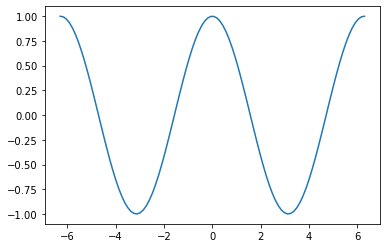

In [54]:
# Agora rode o código abaixo.
plt.plot(x, y)
plt.show()

In [62]:
# Faça o mesmo de antes, mas agora a função é:
# exp(-|x|)
# Pesquisa pela função "abs" no numpy

x = np.exp(-abs(x))

C:\Users\adm\AppData\Local\Temp/ipykernel_14052/3107798129.py:5: RuntimeWarning: overflow encountered in exp
  x = np.exp(np.abs(-x))


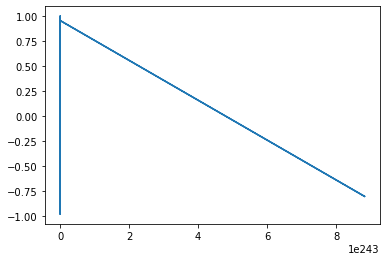

In [63]:
# Agora rode o código abaixo.
plt.plot(x, y)
plt.show()

Vamos fazer uma visualização legal, usando como referência 
[o blog do John D Cook](johndcook.com/blog/2017/10/07/exponential-sums-make-pretty-pictures).


A ideía é que as soma parciais de "exponenciais complexas",
$$ \sum_{n=0}^{N} \exp{\left(2\cdot\pi\cdot j \cdot \left(\frac{n}{m} + \frac{n^2}{d} + \frac{n^3}{y}\right)\right)} $$

para diferentes valores de $m$, $y$ e $d$, dão gráficos muito bonitos.

![teste](https://www.johndcook.com/expsum01.png)

In [77]:
# Como ficaria a lógica do código no numpy?
y = 21
m = 5
d = 2

N = 2000 # Número de somas parciais

# Para fazer a operação acima com números complexos, faça o seguinte:
# Onde você faria a conta que está dentro da exponencial, faça tudo esquecendo o j.
# Aí, ainda dentro da exponencial, você multiplica tudo por "1j".

n = np.arange(0, N+1)
y = np.exp(2.0 * np.pi * ((n/m) + (n**2/d) + (n**3/y)) * 1j)

# Para obter somas parciais, pesquise "cumsum" dentro do numpy.
# Salve o resultado em uma variável "soma_acumulada"

soma_acumulada = y.cumsum()

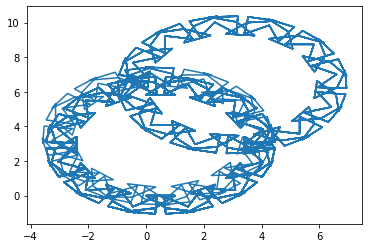

In [78]:
# Com a sua soma acumulada, rode o código abaixo.
plt.plot(np.real(soma_acumulada), np.imag(soma_acumulada))
plt.show()

In [71]:
# Arrays do numpy também têm alguns métodos já salvos neles, para alguns tipos de operações matemáticas.

# Encontre a média e o desvio padrão do array abaixo.
data = [-3.99639747e-01,  1.17716084e-03,  7.57112282e-01, -1.38651800e+00,
         7.67865914e-01, -1.07935805e+00,  2.57581851e-01, -8.42067558e-01,
         1.22636135e+00, -7.89880632e-01]

print("Média: ", np.mean(data))
print("Desvio Padrão: ", np.std(data))

Média:  -0.148736542916
Desvio Padrão:  0.8421443172490778


In [72]:
# Encontre a soma do array abaixo, sem usar fórmulas fechadas.
x = np.arange(0, 398, 1)
x.sum()

79003

### Tipos de dados

Primeiro vamos falar do infinito (e além).

Quando fazemos operações de ponto flutuante no computador, existe um padrão técnico (definido pela IEEE, o Instituto de Engenheiros Eletro-eletrônicos) que define algumas coisas que uma biblioteca tem que ter.

Especificamente, aqui vamos falar de duas coisas:
- Not a Number (NAN)
- Infinito

In [79]:
# Not a Number é o resultado de operações inválidas.
# Embora ele exista no Python, operações inválidas tendem a levantar um erro.
0/0

ZeroDivisionError: division by zero

In [80]:
# Para usá-lo no python, temos que converter string para float.
float('NaN')

nan

In [81]:
# No numpy, temos o objeto nan.
print(np.nan)
print(type(np.nan))

nan
<class 'float'>


In [82]:
# Já no numpy, operações inválidas retornam NaN mesmo.
x1 = np.array([1, 0, 1, 0])
x2 = np.array([2, 1, 2, 0])

print(x1 / x2)

[0.5 0.  0.5 nan]


C:\Users\adm\AppData\Local\Temp/ipykernel_14052/1370221415.py:5: RuntimeWarning: invalid value encountered in true_divide
  print(x1 / x2)


In [83]:
# "Infinito", no padrão, pode ser pensado como um número que é maior que qualquer outro número.
# No caso de "-infinito", temos um número que é menor que qualquer outro número.
1/0

ZeroDivisionError: division by zero

In [84]:
print(float('inf'))
print(float('inf') > 293818943824723984.928)
print(-float('inf') < -293818943824723984.928)

inf
True
True


In [85]:
# No Numpy, não seria diferente.
print(np.inf)
print(np.inf > 293818943824723984.928)
print(-np.inf < -293818943824723984.928)
print(type(np.inf))

inf
True
True
<class 'float'>


In [86]:
# No numpy, algumas operações podem gerar infinitos.
x1 = np.array([1, 0, 1, 0])
x2 = np.array([2, 1, 2, 0])

print(x2 / x1)

[ 2. inf  2. nan]


C:\Users\adm\AppData\Local\Temp/ipykernel_14052/1137161946.py:5: RuntimeWarning: divide by zero encountered in true_divide
  print(x2 / x1)
C:\Users\adm\AppData\Local\Temp/ipykernel_14052/1137161946.py:5: RuntimeWarning: invalid value encountered in true_divide
  print(x2 / x1)


Notou que tanto infinito quanto NaN são do tipo "float"? Não são float64, nem float32, nem anda assim.

Isso é devido à hierarquia de dtypes do numpy.

![hierarchy](https://numpy.org/doc/stable/_images/dtype-hierarchy.png)

In [87]:
# No numpy, nós temos implementados tipos com maior ou menor acurácia.
# Por exemplo, temos float16, float32, e float64, cada um com maior acurácia que o anterior.
f16 = np.float16("0.1")
f32 = np.float32("0.1")
f64 = np.float64("0.1")
f16 == f32 == f64

False

Mas todos os três são diferentes!

Para saber mais:

https://numpy.org/doc/stable/reference/arrays.scalars.html

In [88]:
# Nós também podemos converter o dtype de um array!
print(x1.dtype)

int32


In [89]:
print(x1.astype(np.float32).dtype)

float32


### Broadcasting

https://numpy.org/doc/stable/user/basics.broadcasting.html

In [ ]:
# No numpy, nós conseguimos multiplicar arrays de tamanhos diferentes, 
# desde que faça sentido pensar no array menor "caminhando" pelo maior.

# Pode pensar como se fosse o menor sendo duplicado, triplicado, etc...,
# até os dois arrays terem mesmo tamanho.

![broadcasting_ok](https://numpy.org/doc/stable/_images/broadcasting_2.png)

![broadcasting_nok](https://numpy.org/doc/stable/_images/broadcasting_3.png)

In [90]:
a = np.array([[0,0,0],
              [10, 10, 10],
              [20, 20, 20],
              [30, 30, 30]])

b = np.array([1, 2, 3])
c = np.array([1, 2, 3, 4])

In [91]:
a * b

array([[ 0,  0,  0],
       [10, 20, 30],
       [20, 40, 60],
       [30, 60, 90]])

In [92]:
a * c

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 